# ActionCSA demo

Sine potential model. 

With periodic potential,Package doing it automaticaly and use label to gather data

1. Action CSA


## Periodic potential

Since we are finding multiple pathway, we need toy example that has multiple pathways. Here, we are going to use simple periodic model.

f

In [1]:
import numpy as np
from taps.coords.cartesian import Cartesian
from taps.models.models import PeriodicModel3
from taps.paths import Paths
from taps.db import ImageData

N = 300
x = np.linspace(-np.pi, np.pi, N)
y = np.linspace(-np.pi, np.pi, N)
coords = Cartesian(coords=np.array([x, y]))
model = PeriodicModel3()
directory = '/home/schinavro/libCalc/taps/examples/flattest/'
imgdb = ImageData(directory + "cos_poten.db")
paths = Paths(coords=coords, model=model, finder=finder, imgdb=imgdb)

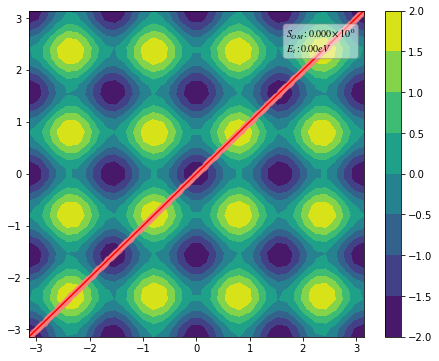

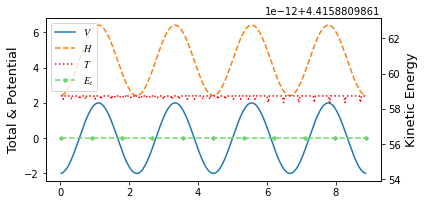

In [2]:
from taps.visualize import view
view(paths, calculate_map=True)

Action name  : Onsager Machlup + Energy conservation
Target energy: -0.2
Target type  : manual
muE          : 1.0
gamma        : 1.0
            Iter   nfev   njev        S   dS_max
converg :    272    280    280  55.3255   1.8133
converg :    273    284    284  55.3175   2.8725
jac_max > tol(0.01); Run without gradient
converg :    274    288    288  55.3122   1.0199


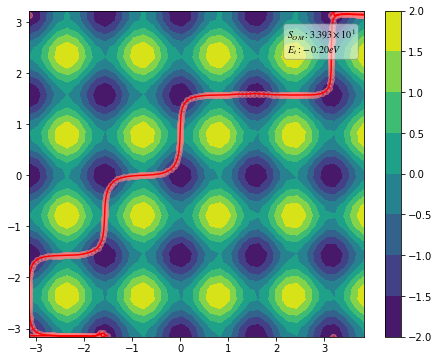

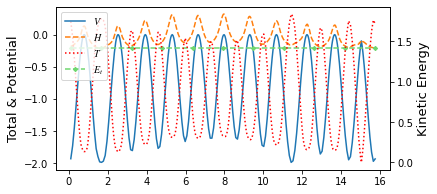

In [3]:
from taps.pathfinder import DAO, GPAO

search_kwargs = {"method":"L-BFGS-B",
                  "options": {'disp': None,
                              'maxcor': 20,
                              'ftol': 2.220446049250313e-4,
                              'gtol': 1e-03,
                              'eps': 5e-6, 
                              'maxfun': 1000,
                              'maxiter': 1000,
                              'iprint': -1, 'maxls': 100,
                              'finite_diff_rel_step': 1e-6}}
finder = DAO(prj_search = False, muE=1.,tol = 1e-2,gam = 1., Et = -0.2,
            action_name = ['Onsager Machlup', "Energy conservation"],
            search_kwargs = search_kwargs)

paths.finder = finder
paths.coords.epoch = 15
paths.fluctuate(fluctuation=5)
paths.search()
view(paths, calculate_map=True)

In [5]:
from taps.ml import Gaussian
from taps.pathfinder import GPAO




hyperparameters = {'sigma_f': 1, 'sigma_n^f': 1e-3, 
                   'sigma_n^e':1e-2, 'l^2': 0.1}
hyperparameters_bounds = {'sigma_f': (1e-1, 1e4), 'sigma_n^f': (1e-4, 1e-2), 
                          'sigma_n^e':(1e-4, 1e-1), 'l^2': (1e-4, 4)}

model = PeriodicModel3()
model = Gaussian(real_model=model,
                 hyperparameters=hyperparameters,
                 hyperparameters_bounds=hyperparameters_bounds)
finder = DAO()
finder = GPAO(real_finder=paths.finder, 
                    label= directory + "gpao_1/1", phases=["auto et"])

paths.model = model
paths.finder = finder
paths.add_image_data(index=[0, -1])
paths.search()

NotImplementedError: 

TypeError: 'NoneType' object is not subscriptable

Action name  : Onsager Machlup + Energy conservation
Target energy: -0.45
Target type  : manual
muE          : 1.0
gamma        : 1.0
            Iter   nfev   njev        S   dS_max
converg :    224    238    238   2.3629   0.4154
converg :    226    243    243   2.3621   0.1836
jac_max > tol(0.01); Run without gradient
converg :    227    247    247   2.3618   0.2556


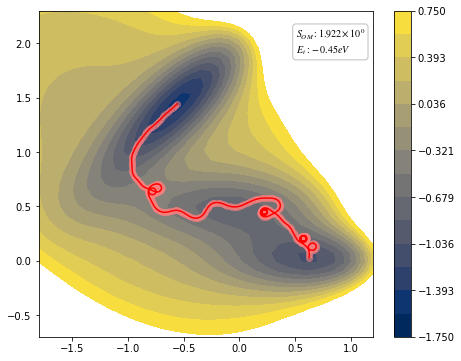

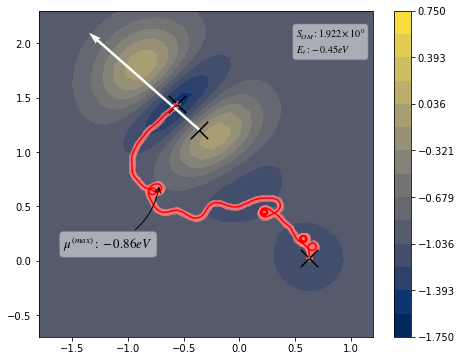

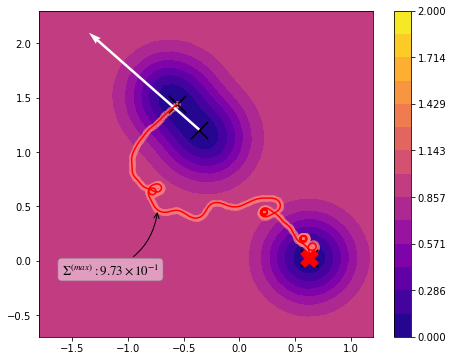

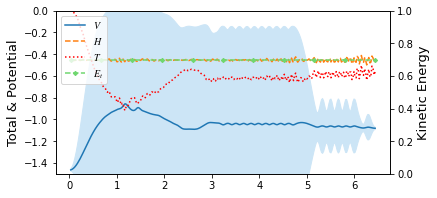

In [1]:
import numpy as np
from taps.paths import Paths
from taps.pathfinder import DAO
from taps.models import MullerBrown
from taps.coords import Coords
from taps.visualize import view
from taps.db import ImageData
from taps.projectors import Sine

N = 300
Nk = N - 210

x = np.linspace(-0.55822365, 0.6234994, N)
y = np.linspace(1.44172582, 0.02803776, N)

coords = Coords(coords=np.array([x, y]))
model = MullerBrown()
from taps.models import Gaussian
hyperparameters = {'sigma_f': 1, 'sigma_n^f': 1e-8, 'sigma_n^e':1e-6,
                   'l^2': 0.1}
hyperparameters_bounds = {'sigma_f': (1, 1), 'sigma_n^f': (1e-8, 1e-6), 'sigma_n^e':(1e-6, 1e-4), 'l^2': (1e-4, 4)}


model = Gaussian(real_model=model,
                 hyperparameters=hyperparameters,
                 hyperparameters_bounds=hyperparameters_bounds)
imgdb = ImageData("mullerbrown.db")



search_kwargs = {"method":"L-BFGS-B",
                  "options": {'disp': None,
                              'maxcor': 20,
                              'ftol': 2.220446049250313e-4,
                              'gtol': 1e-03,
                              'eps': 5e-6, 
                              'maxfun': 1000,
                              'maxiter': 1000,
                              'iprint': -1, 'maxls': 100,
                              'finite_diff_rel_step': 1e-6}}


prj = Sine(N=N, Nk=Nk, init=coords[:, 0].copy(), fin=coords[:, -1].copy())

finder = DAO(Et=-0.45, muE=1., tol=1e-2, gam=1.,
             action_name = ['Onsager Machlup', "Energy conservation"],
             prj_search=True, sin_search=False,
             search_kwargs=search_kwargs, 
             prj=prj)

paths = Paths(coords=coords, model=model, imgdb=imgdb, finder=finder)


In [ ]:
from taps.finder.gpao import GPAO
directory = "./mbgpao/"
finder = GPAO(real_finder=finder, label= directory + "gpao_1/1", phases=["auto et"])
paths.finder=finder
paths.search()